In [35]:
#importing data
#EDA
#Feature engineering techniques (preprocessing)
#Model Building
#model Evaluation
import pandas as pd
import seaborn as sns
df=pd.read_csv("Credit_card_fraud_detection.csv")
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,100000,1,2,1,29,0,0,0,0,-1,...,-2618,95748,101299,3320,5000,0,100000,7186,0,0
997,200000,2,2,1,28,0,0,0,0,0,...,97041,103541,3632,5000,2000,89000,6500,91,1504,0
998,90000,2,2,1,40,-1,-1,-1,-1,-1,...,657,1332,780,0,2806,2256,2274,780,0,0
999,360000,1,1,2,36,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [39]:
import pandas as pd

# Assuming df is your DataFrame
unique_values_per_column = {}
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) <= 10:
        unique_values_per_column[column] = unique_values

# Print unique values for each column
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'SEX': [1 2]
Unique values in column 'EDUCATION': [2 1 3 5 4 6]
Unique values in column 'MARRIAGE': [1 2 3 0]
Unique values in column 'PAY_0': [-1  0 -2  1  2  3  4  8]
Unique values in column 'PAY_2': [ 0 -1 -2  2  3  5  7  4  1]
Unique values in column 'PAY_3': [-1  0  2 -2  3  4  6  7  1  5]
Unique values in column 'PAY_4': [ 0 -2 -1  2  3  4  5  7]
Unique values in column 'PAY_5': [ 0 -1  2 -2  3  5  4  7]
Unique values in column 'PAY_6': [ 0 -1  2 -2  3  6  4  7]
Unique values in column 'default payment next month': [0 1]


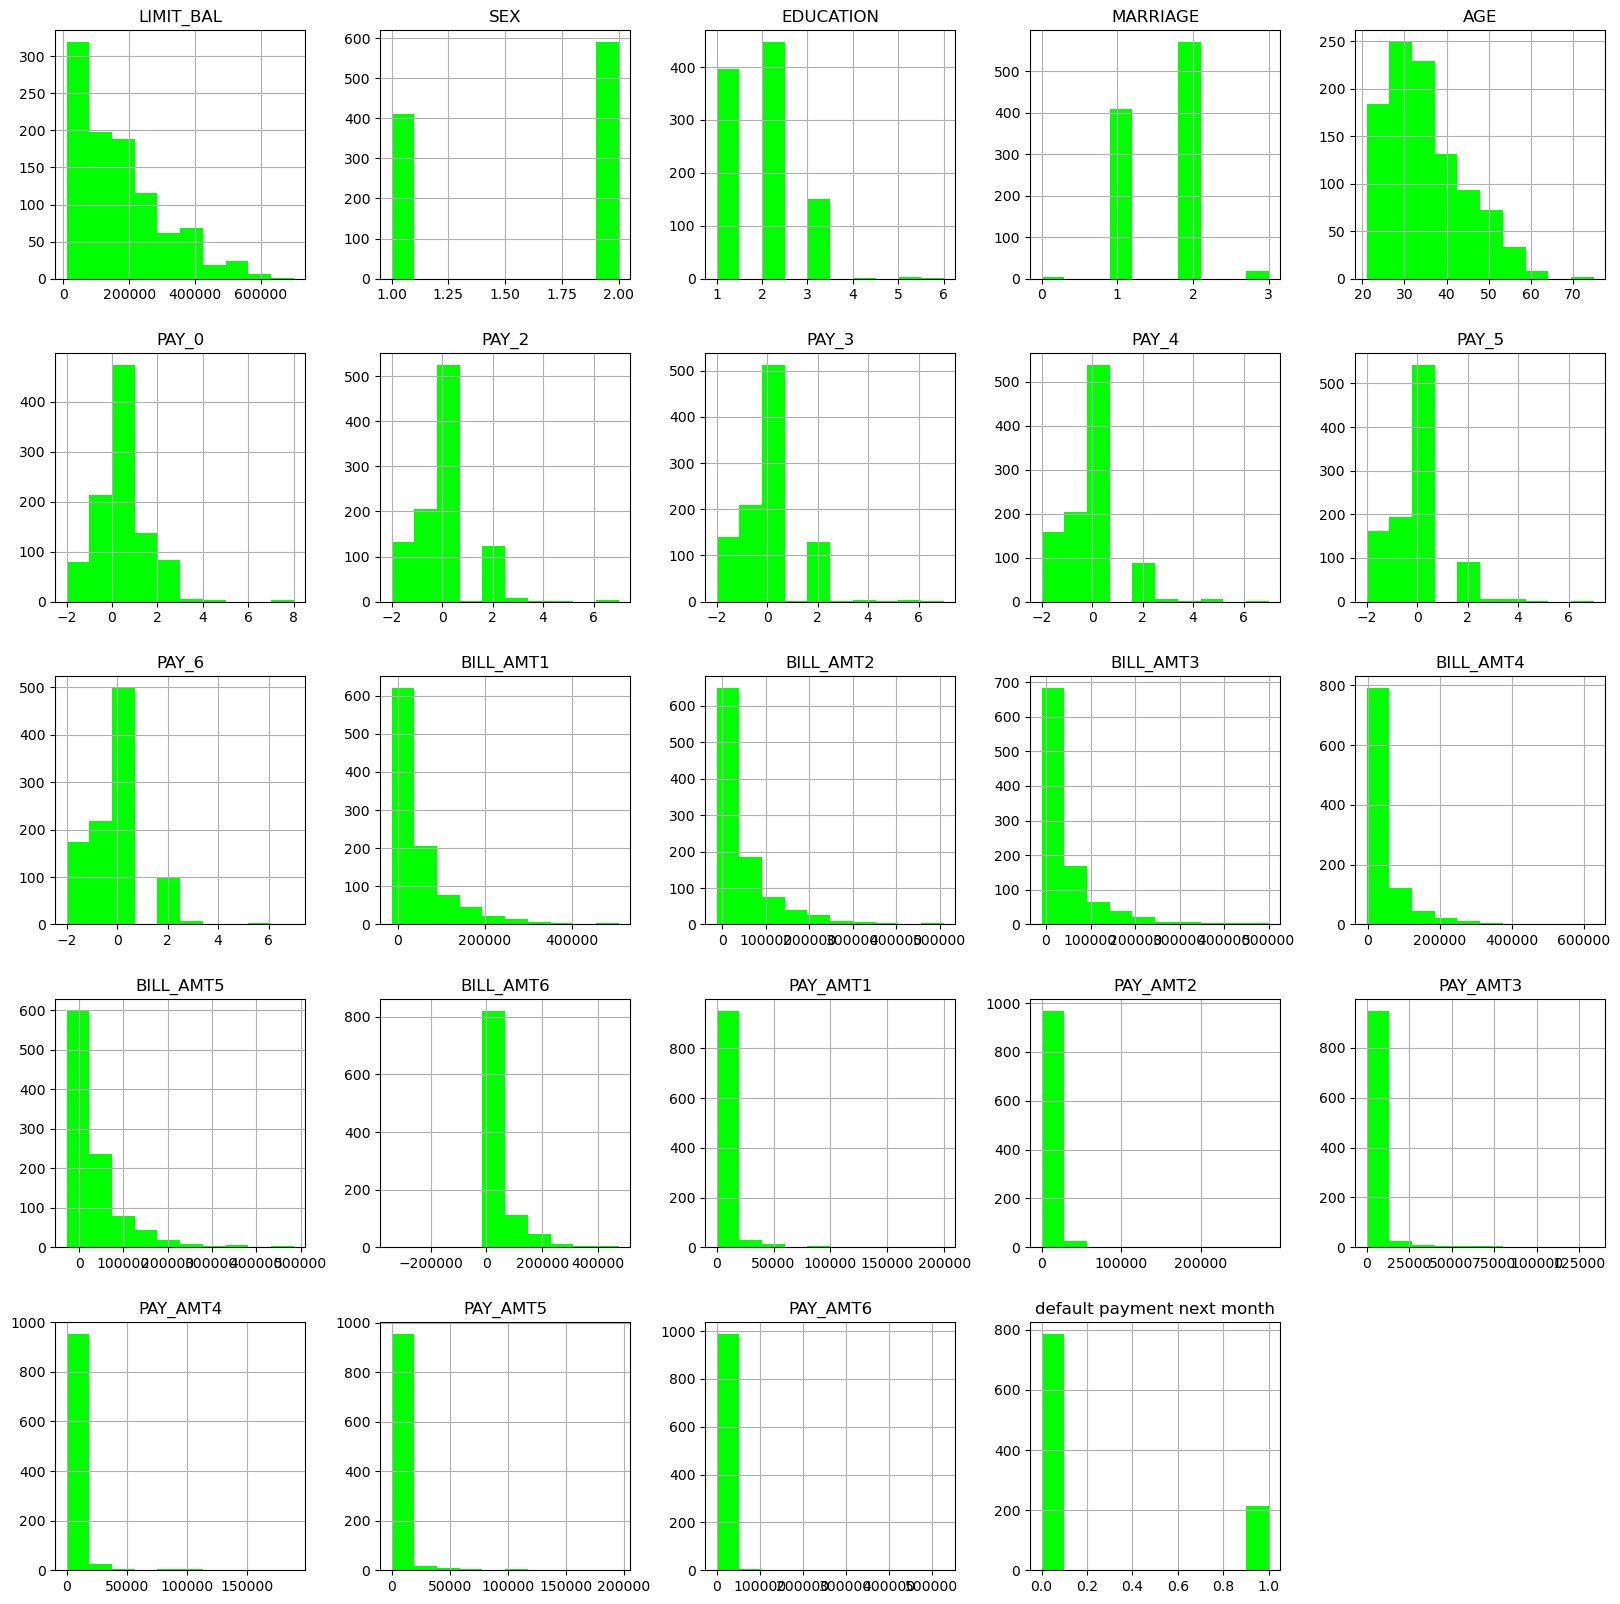

In [40]:
df.hist(figsize=(20,20),color='lime')
import matplotlib.pyplot as plt
plt.show()

<Axes: >

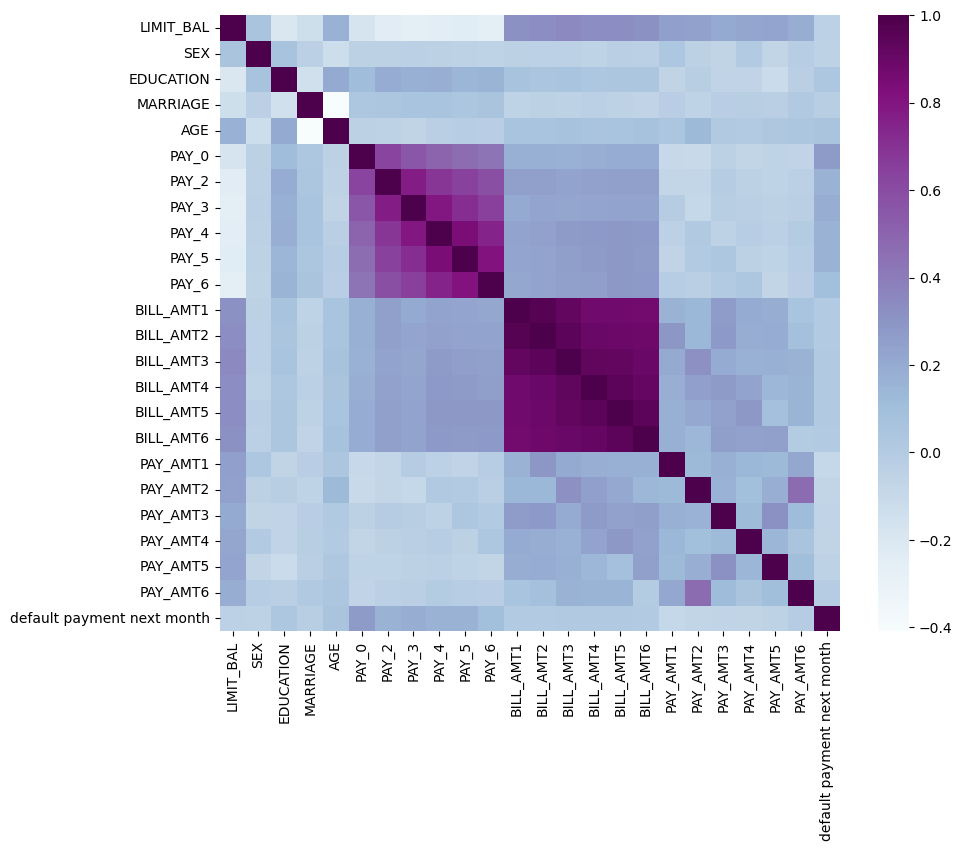

In [41]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr,cmap='BuPu')

In [42]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

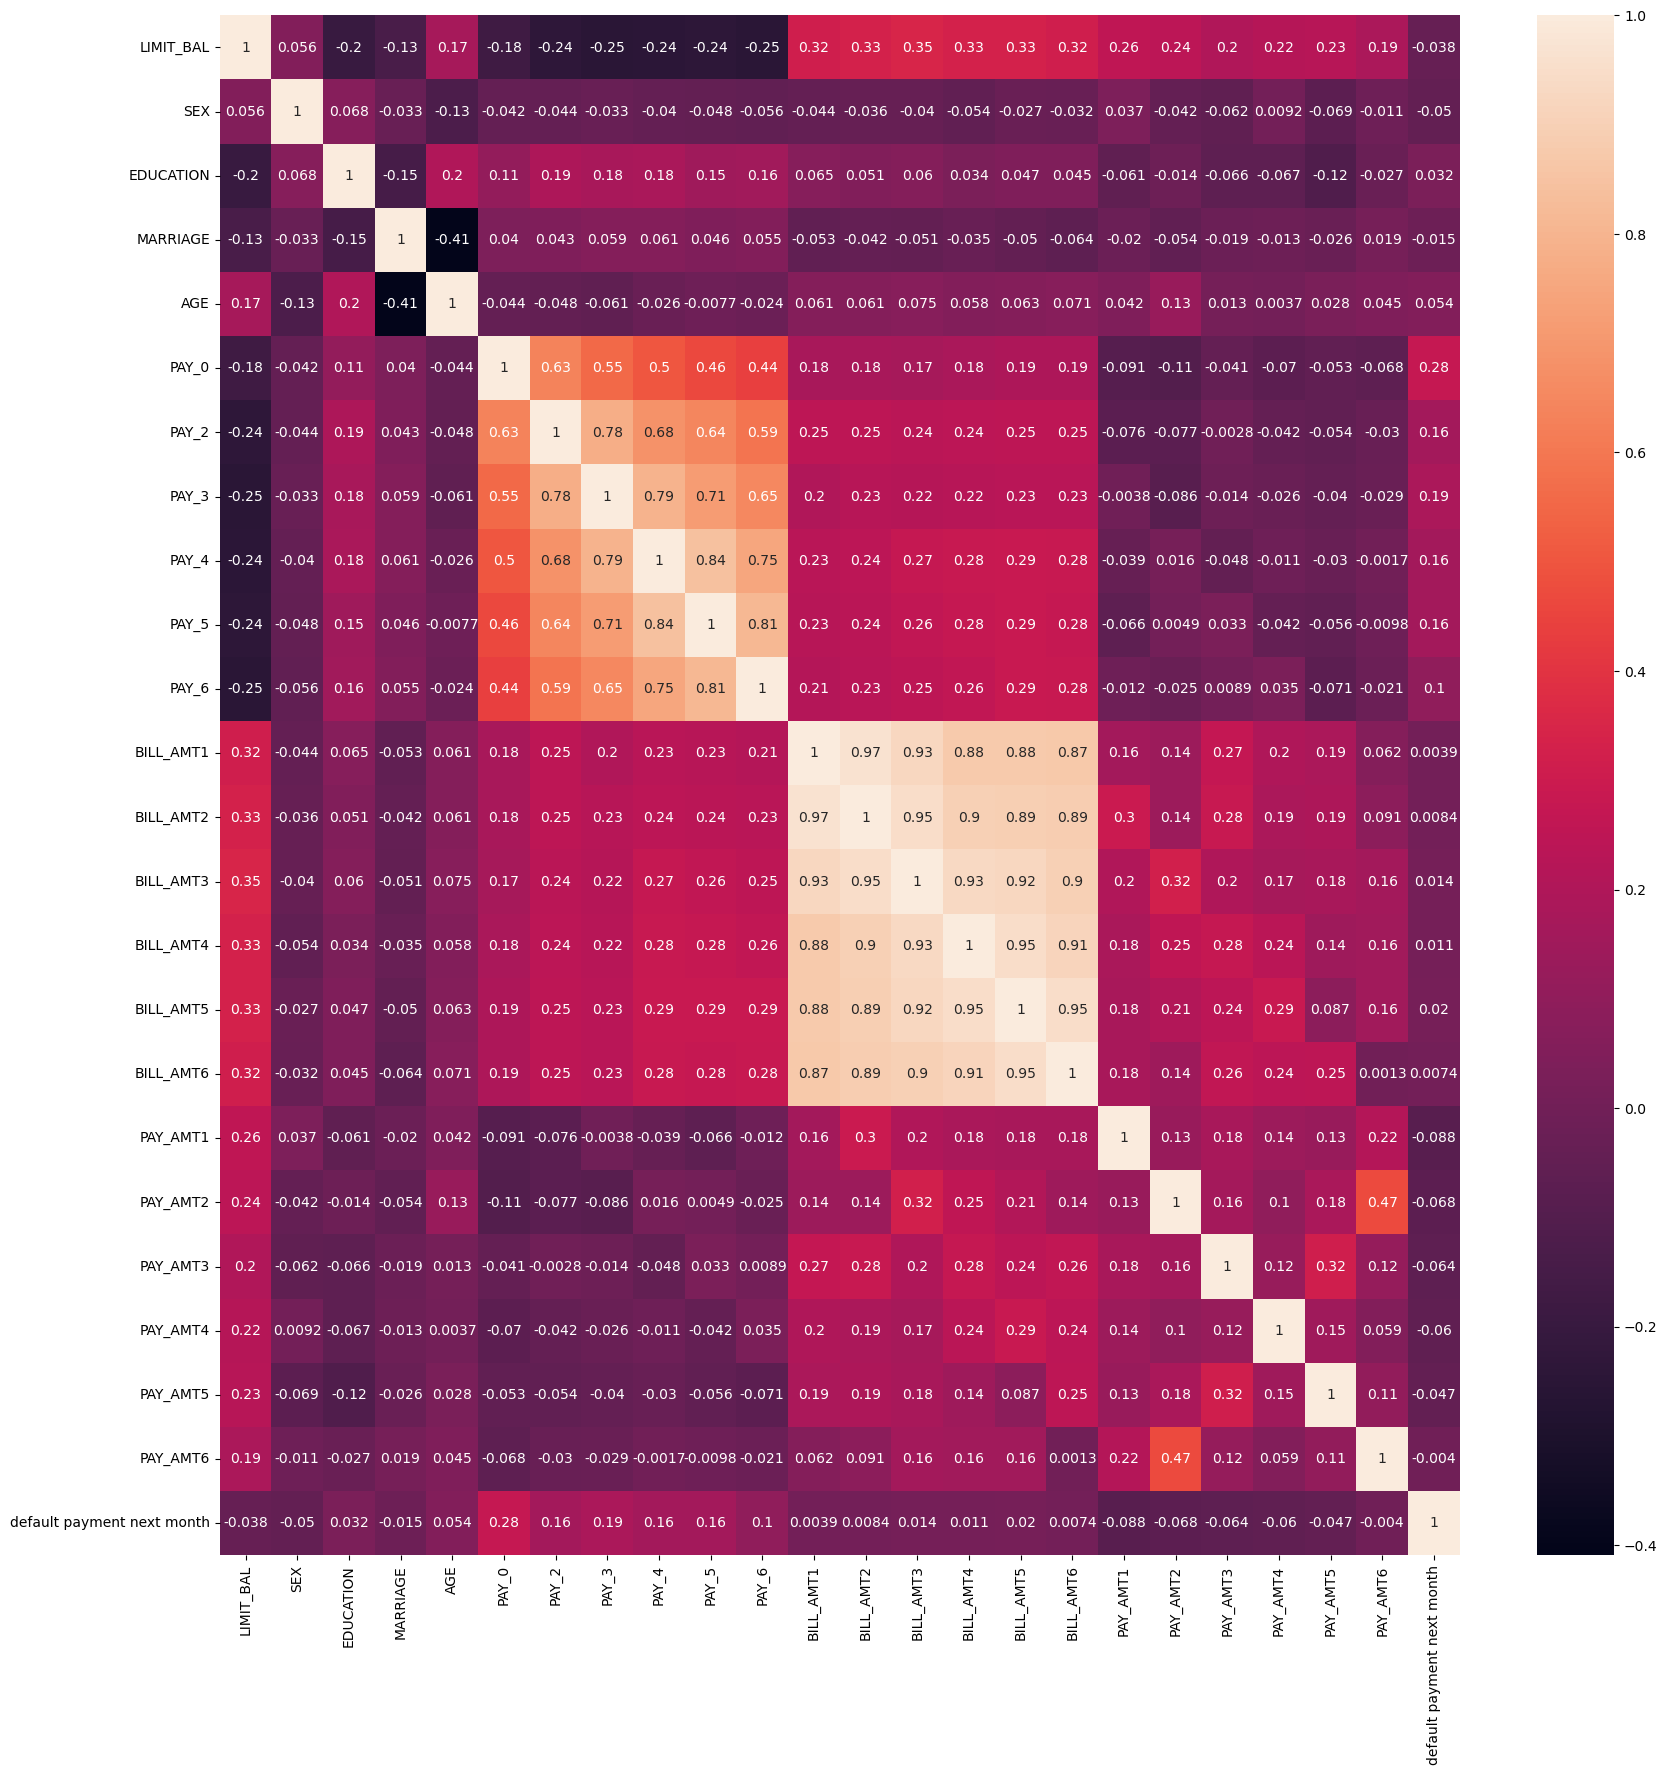

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [44]:
#Seperate the numerical and categorical values
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [45]:
len(df['default payment next month'].value_counts())

2

In [46]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [48]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,1001.0,167532.467532,130587.921320,10000.0,50000.0,140000.0,240000.0,700000.0
SEX,1001.0,1.589411,0.492187,1.0,1.0,2.0,2.0,2.0
EDUCATION,1001.0,1.776224,0.750916,1.0,1.0,2.0,2.0,6.0
MARRIAGE,1001.0,1.604396,0.532298,0.0,1.0,2.0,2.0,3.0
AGE,1001.0,34.945055,9.219760,21.0,28.0,33.0,41.0,75.0
PAY_0,1001.0,-0.004995,1.173446,-2.0,-1.0,0.0,0.0,8.0
PAY_2,1001.0,-0.161838,1.228732,-2.0,-1.0,0.0,0.0,7.0
PAY_3,1001.0,-0.164835,1.262459,-2.0,-1.0,0.0,0.0,7.0
PAY_4,1001.0,-0.283716,1.184662,-2.0,-1.0,0.0,0.0,7.0
PAY_5,1001.0,-0.283716,1.170224,-2.0,-1.0,0.0,0.0,7.0


In [50]:
#pandas profiling for EDA
# !pip install pandas-profiling 

In [51]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_widgets()

In [52]:
x=df.drop(labels=['default payment next month'],axis=1)
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
1,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
2,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
3,100000,2,2,2,23,0,-1,-1,0,0,...,601,221,-159,567,380,601,0,581,1687,1542
4,140000,2,3,1,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,100000,1,2,1,29,0,0,0,0,-1,...,67782,-2618,95748,101299,3320,5000,0,100000,7186,0
997,200000,2,2,1,28,0,0,0,0,0,...,8441,97041,103541,3632,5000,2000,89000,6500,91,1504
998,90000,2,2,1,40,-1,-1,-1,-1,-1,...,1114,657,1332,780,0,2806,2256,2274,780,0
999,360000,1,1,2,36,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y=df['default payment next month']
y

0       0
1       0
2       0
3       0
4       0
       ..
996     0
997     0
998     0
999     1
1000    1
Name: default payment next month, Length: 1001, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [55]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [56]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
900,80000,2,2,2,40,2,0,0,0,2,...,59863,62860,63976,63293,2200,2200,4000,1777,0,2000
439,200000,2,1,2,27,0,0,0,0,0,...,126355,114881,117213,124793,5704,5930,4000,4003,10033,4400
614,60000,1,1,2,25,0,0,0,0,0,...,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
696,400000,2,2,2,40,-2,-2,-2,-2,-1,...,0,0,1524,0,8235,0,0,1524,0,385
128,420000,1,2,1,34,0,0,0,0,0,...,229049,220951,210606,188108,9744,9553,7603,7830,7253,11326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,180000,2,1,2,36,-2,-2,-2,-2,-2,...,11936,40420,9210,17795,21197,11936,40420,9210,17795,6915
223,20000,1,2,1,37,0,0,0,0,0,...,18902,18768,18650,19175,1609,3000,663,676,834,782
271,70000,2,2,2,36,0,0,0,0,0,...,68376,30163,14310,15085,4483,12496,3268,3000,3000,2000
474,500000,2,1,1,38,-1,2,-1,-1,-1,...,501,300,600,450,0,501,300,600,300,600


In [57]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
891,200000,1,1,2,31,-2,-2,-2,-2,-2,...,100,100,100,100,100,100,100,100,100,100
694,280000,1,1,1,41,-2,-2,-2,-2,-1,...,51500,35752,3955,13969,41346,52110,35752,3955,13939,4437
798,50000,2,3,1,44,-1,-1,-1,-1,0,...,0,7472,10174,11104,780,0,7472,3000,1104,1000
147,80000,1,1,2,25,0,0,0,0,0,...,43476,41087,41951,31826,30000,3000,6000,8000,2000,14000
859,10000,2,2,1,31,0,0,0,0,0,...,9901,9975,9736,8703,2330,2200,1000,333,311,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,80000,1,1,2,30,-2,-1,0,0,0,...,600,1438,1919,5380,504,500,1000,500,3500,0
835,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
601,50000,1,1,2,34,1,2,2,2,2,...,24121,23437,25101,24549,0,2700,0,2200,0,1030
171,130000,1,3,1,56,1,2,2,2,2,...,67282,68557,72796,71345,3000,3000,3000,5500,0,0


In [58]:
ss=StandardScaler()

In [59]:
s_train=ss.fit_transform(X_train)
s_test=ss.transform(X_test)

In [60]:
NB = GaussianNB()
NB.fit(s_train,y_train)

GaussianNB()

In [61]:
y_pred=NB.predict(s_test)
accuracy_score(y_test,y_pred)*100

70.5179282868526

In [62]:
#hyperparameter tuning the parameter in Guassian Naive Bayes
param_grid={"var_smoothing":[0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(NB,param_grid=param_grid,cv=5,verbose=3)
gs.fit(s_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................var_smoothing=0.1;, score=0.800 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.720 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.707 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.800 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.547 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.793 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;, score=0.713 total time=   0.0s
[CV 3/5] END ...............var_smoothing=0.001;, score=0.633 total time=   0.0s
[CV 4/5] END ...............var_smoothing=0.001;, score=0.667 total time=   0.0s
[CV 5/5] END ...............var_smoothing=0.001;, score=0.447 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.5;, score=0.793 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.5;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.001, 0.5, 0.05, 0.01, 1e-08,
                                           1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [63]:
gs.best_params_

{'var_smoothing': 0.5}

In [64]:
NB1 = GaussianNB(var_smoothing=0.5)
NB1.fit(s_train,y_train)
y_pred1=NB1.predict(s_test)
print("The Increased Accuracy is:",accuracy_score(y_test,y_pred1)*100)

The Increased Accuracy is: 80.47808764940238


In [65]:
rs=RandomForestClassifier()
rs.fit(s_train,y_train)
y_pred2=rs.predict(s_test)
print("The Accuracy of Random Forest",accuracy_score(y_test,y_pred2)*100)

The Accuracy of Random Forest 81.67330677290838


In [27]:
param_grid_rf = { "n_estimators": [50,100,130,200],
                    "max_depth": range(3,11,1),
                    "random_state":[0,50,100],
                     "criterion":['gini',"entropy"]
                     }
gs1=GridSearchCV(rs,param_grid=param_grid_rf,cv=5,verbose=3)
gs1.fit(s_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.780 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=0;, score=0.760 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.780 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50, random_state=50;, s

[CV 1/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=0;, score=0.767 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=0;, score=0.747 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=0;, score=0.787 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=0;, score=0.800 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=0;, score=0.760 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=50;, score=0.773 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=50;, score=0.767 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=50;, score=0.780 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=100, random_state=50;, score=0.813 total time=   0.2s
[CV 5/5] END criterion=g

[CV 2/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=0;, score=0.753 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=0;, score=0.787 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=0;, score=0.807 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=0;, score=0.747 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=50;, score=0.767 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=50;, score=0.767 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=50;, score=0.787 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=50;, score=0.813 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=130, random_state=50;, score=0.753 total time=   0.4s
[CV 1/5] END criterion=

[CV 3/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=0;, score=0.780 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=0;, score=0.813 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=0;, score=0.747 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=50;, score=0.780 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=50;, score=0.753 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=50;, score=0.780 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=50;, score=0.813 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=50;, score=0.747 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=200, random_state=100;, score=0.780 total time=   0.6s
[CV 2/5] END criterio

[CV 4/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=0;, score=0.773 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=0;, score=0.760 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.800 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.760 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.793 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=50;, score=0.767 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=100;, score=0.793 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=50, random_state=100;, score=0.760 total time=   0.2s
[CV 3/5] END criterion=gini,

[CV 5/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=0;, score=0.727 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=50;, score=0.793 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=50;, score=0.767 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=50;, score=0.793 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=50;, score=0.820 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=50;, score=0.740 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=100;, score=0.793 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=100;, score=0.760 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=100, random_state=100;, score=0.793 total time=   0.4s
[CV 4/5] END crit

[CV 5/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=0;, score=0.740 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=50;, score=0.787 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=50;, score=0.753 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=50;, score=0.780 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=50;, score=0.807 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=50;, score=0.747 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=100;, score=0.793 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=100;, score=0.753 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=130, random_state=100;, score=0.813 total time=   0.5s
[CV 4/5]

[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=0;, score=0.793 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=0;, score=0.773 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=50;, score=0.780 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=50;, score=0.773 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=50;, score=0.800 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=50;, score=0.800 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=50;, score=0.767 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=100;, score=0.780 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=200, random_state=100;, score=0.773 total time=

[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=0;, score=0.780 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=0;, score=0.747 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.787 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.780 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.787 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.807 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=50;, score=0.753 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=100;, score=0.780 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=50, random_state=100;, score=0.767 total time=   0.2s
[

[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=0;, score=0.780 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=0;, score=0.800 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=0;, score=0.753 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=50;, score=0.780 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=50;, score=0.753 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=50;, score=0.780 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=50;, score=0.813 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=50;, score=0.753 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=100, random_state=100;, score=0.787 total time=  

[CV 2/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=0;, score=0.753 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=0;, score=0.787 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=0;, score=0.800 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=0;, score=0.747 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=50;, score=0.773 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=50;, score=0.760 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=50;, score=0.787 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=50;, score=0.807 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=7, n_estimators=130, random_state=50;, score=0.760 total time=   0

[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=0;, score=0.807 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=0;, score=0.753 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=0;, score=0.773 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=0;, score=0.813 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=0;, score=0.740 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=50;, score=0.787 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=50;, score=0.747 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=50;, score=0.787 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=200, random_state=50;, score=0.800 total time=   0.

[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=200, random_state=100;, score=0.753 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.780 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.753 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.780 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.800 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=0;, score=0.733 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=50;, score=0.813 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=50;, score=0.747 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=50, random_state=50;, score=0.793 total time=   0

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130, 200],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [28]:
gs1.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100, 'random_state': 0}

In [66]:
rs1=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators= 100,random_state=0)
rs1.fit(s_train,y_train)
y_pred3=rs1.predict(s_test)
accuracy_score(y_test,y_pred3)*100

84.06374501992032

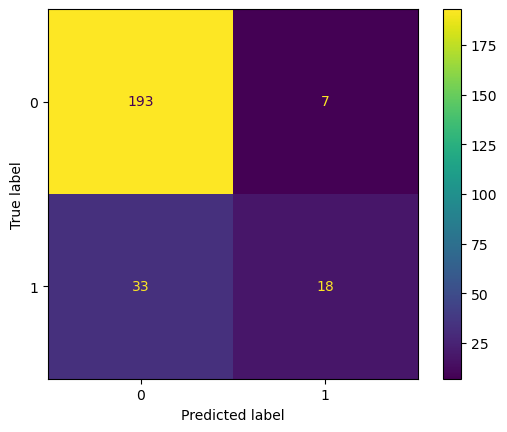

In [75]:
cm=confusion_matrix(y_test,y_pred3)
cmm=ConfusionMatrixDisplay(cm)
cmm.plot()
plt.show()

In [67]:
import pickle
with open('randomForest_model.pkl', 'wb') as f:
    pickle.dump(rs1, f)


In [68]:
# !pip install xgboost

In [69]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(s_train,y_train)
y_pred4=xgb.predict(s_test)
accuracy_score(y_test,y_pred4)*100

79.2828685258964

In [70]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf')
model_svc.fit(s_train, y_train)
model_svc.score(s_train,y_train)

0.8053333333333333

In [71]:
model_svc.score(s_test,y_test)

0.8007968127490039